In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Read files to dictionary
data_path = "highd-dataset-v1.0\data"
n_files = 60
data_dict = {}
for i in range(n_files):
    print(f"reading file {i+1}/{n_files}...\r", end="")
    file_name = f"{i+1:02d}_tracksMeta.csv"
    file_path = os.path.join(data_path, file_name)
    data_dict[f"data_{i+1}"] = pd.read_csv(file_path)

In [30]:
# Compute density 
# 2 types of densities when it comes to vehicles on the road: 
#  - critical densities
#  - jam density
# In general, jam density is five times the critical density. Inverse of density is spacing (s), which is the center-to-center distance between two vehicles.
# The density of a traffic flow is the number of vehicles present on a unit of road length at a given moment. Just like the intensity the density can refer to a total road, a roadway, or a lane. Customary units for density are veh/km and veh/m. 

# In this case, we differentiate between the top lane and bottom lane. 
# We will be using the full length of the lane to analyse the density within a specific time frame, then plotting it into a histogram. 
# We arbitrarily set the bin-size to 250 frames.

frameRate = 25
frameTime = 1/frameRate

# modifiable parameters
size_of_bins = 2400
length_of_road = 410
dataset = 1

# for i in range(n_files):
frames = data_dict[f"data_{dataset}"]["drivingDirection"].shape[0]
print(frames)
n_bins = data_dict[f"data_{dataset}"]["finalFrame"][frames-1]//size_of_bins+1
print(n_bins)
# initialization of bins for each direction
bins_1 = [0]*(n_bins)
bins_2 = [0]*(n_bins)

for j in range(frames):
    # we compute the floor of the initial and final frame for each vehicle
    initial = data_dict[f"data_{dataset}"]["initialFrame"][j]//size_of_bins
    final = data_dict[f"data_{dataset}"]["finalFrame"][j]//size_of_bins

    if(data_dict[f"data_{dataset}"]["drivingDirection"][j] == 1):
        # we increment the bin where the vehicle is in 
        for k in range(initial, final+1):
            bins_1[k] += 1
    else:
        # we increment the bin where the vehicle is in 
        for k in range(initial, final+1):
            bins_2[k] += 1

1047
10


Text(0.04, 0.5, 'Density (#Cars / Length of road)')

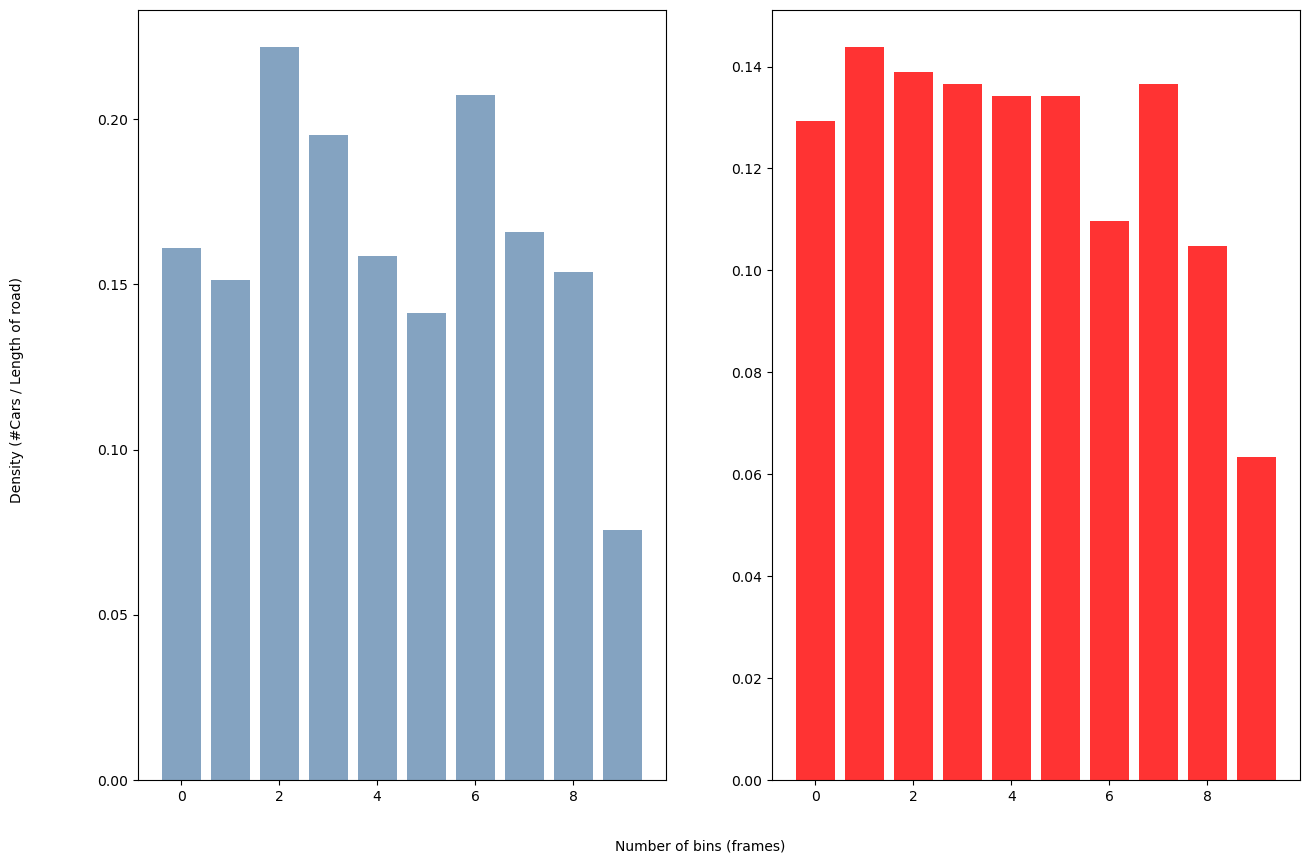

In [31]:
# We plot everything
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].bar([i for i in range(len(bins_2))], np.array(bins_1)/length_of_road, label='direction 1', color=(0.2, 0.4, 0.6, 0.6))
axes[1].bar([i for i in range(len(bins_2))], np.array(bins_2)/length_of_road, label='direction 2', color=(1, 0.2, 0.2, 1))
fig.text(0.5, 0.04, 'Number of bins (frames)', ha='center')
fig.text(0.04, 0.5, 'Density (#Cars / Length of road)', va='center', rotation='vertical')
